In [2]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
shape = df.shape
shape


(768, 9)

In [4]:
diabetic =(df['Outcome']==1).sum()
non_diabetic = (df['Outcome']==0).sum()
print(diabetic, non_diabetic)


268 500


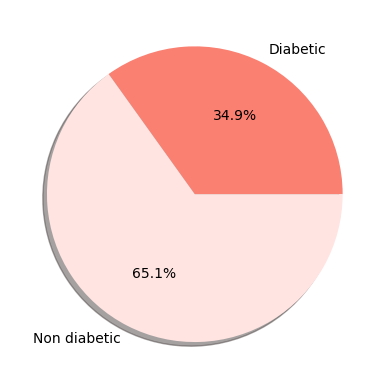

In [5]:
import matplotlib.pyplot as plt
shades=['salmon','mistyrose']
data ={
    'Diabetic' :diabetic,
    'Non diabetic' :non_diabetic
}
plt.pie(data.values(), labels=data.keys(),colors=shades,shadow=True, autopct='%2.1f%%')
plt.show()


In [6]:
pd.crosstab(df['Pregnancies'],df['Outcome'], margins =True).style.background_gradient(cmap='YlOrRd')

Outcome,0,1,All
Pregnancies,,,
0,73,38,111
1,106,29,135
2,84,19,103
3,48,27,75
4,45,23,68
5,36,21,57
6,34,16,50
7,20,25,45
8,16,22,38


In [7]:
#calculating no. of zeros in BloodPressure column

zeros_in_BP = (df['BloodPressure']==0).sum()
non_zeros_in_BP = (df['BloodPressure']>0).sum()
# print(zeros_in_BP,non_zeros_in_BP)
non_zeros_BP_median_1= df[df['BloodPressure']!=0 & (df['Outcome']==1)]['BloodPressure'].median()
non_zeros_BP_median_0 = df[df['BloodPressure']!=0 & (df['Outcome']==0)]['BloodPressure'].median()
print(non_zeros_BP_median_1, non_zeros_BP_median_0)

72.0 72.0


In [8]:
df.loc[(df['BloodPressure']==0) & (df['Outcome']==1), 'BloodPressure']=non_zeros_BP_median_1
df.loc[(df['BloodPressure']==0) & (df['Outcome']==0), 'BloodPressure']=non_zeros_BP_median_0
print((df['BloodPressure']==0).sum())

0


In [9]:
zeros_in_skinThickness = (df['SkinThickness']==0).sum()
non_zero_skinThickness_median_1 = df[(df['SkinThickness']!=0) & (df['Outcome']==1)]['SkinThickness'].median()
non_zero_skinThickness_median_0 = df[(df['SkinThickness']!=0) & (df['Outcome']==0)]['SkinThickness'].median()
print(non_zero_skinThickness_median_1, non_zero_skinThickness_median_0)
df.loc[(df["SkinThickness"]==0) & (df['Outcome']==1), 'SkinThickness']=non_zero_skinThickness_median_1
df.loc[(df["SkinThickness"]==0) & (df['Outcome']==0), 'SkinThickness']=non_zero_skinThickness_median_0

32.0 27.0


In [10]:
print((df['SkinThickness']==0).sum())

0


In [11]:
zeros_in_insulin=(df['Insulin']==0).sum()
non_zero_insulin_median = df[(df['Insulin']!=0)]['Insulin'].median()
non_zero_insulin_median=round(non_zero_insulin_median,0)
non_zero_insulin_median

125.0

In [13]:
df.loc[(df['Insulin']==0) , 'Insulin']=non_zero_insulin_median
print((df['Insulin']==0).sum())
print(df.head())

0
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             32      125  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [14]:
zeros_in_Glucose = (df["Glucose"]==0).sum()
non_zero_glucose_median_1 = df[(df['Glucose']!=0) & (df['Outcome']==1)]["Glucose"].median()
non_zero_glucose_median_0 = df[(df['Glucose']!=0) & (df['Outcome']==0)]["Glucose"].median()
non_zero_glucose_median_1,non_zero_glucose_median_0

(140.0, 107.0)

In [15]:
df.loc[(df["Glucose"]==0) & (df['Outcome']==1), 'Glucose']=non_zero_glucose_median_1
df.loc[(df["Glucose"]==0) & (df['Outcome']==0), 'Glucose']=non_zero_glucose_median_0
zeros_in_Glucose = (df["Glucose"]==0).sum()
zeros_in_Glucose

0

In [16]:
low_glucose =(df['Glucose'] < 70).sum()
normal_glucose=((df['Glucose'] >= 70) & (df['Glucose'] <= 100)).sum()
high_glucose=((df['Glucose'] >100)).sum()
print(low_glucose, normal_glucose, high_glucose)

11 198 559


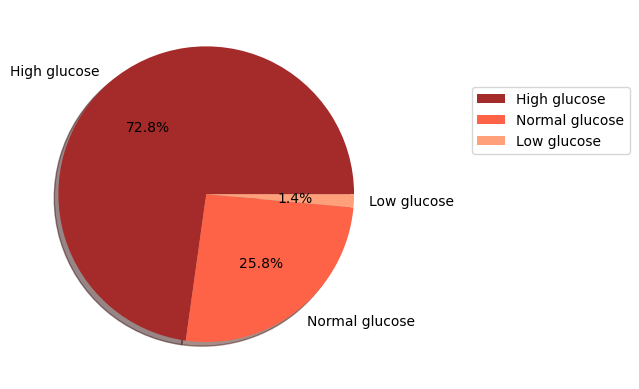

In [17]:
shades = ['brown','tomato','lightsalmon']
data={
    'High glucose' : high_glucose,
    'Normal glucose': normal_glucose,
    'Low glucose': low_glucose
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

In [18]:
dia_low_glucose =((df['Glucose'] < 70) & (df['Outcome']==1)).sum()
dia_normal_glucose=((df['Glucose'] > 70) & (df['Glucose'] <= 100) & (df['Outcome']==1)).sum()
dia_high_glucose=((df['Glucose'] >100) & (df['Outcome']==1)).sum()
print(dia_low_glucose ,dia_normal_glucose,dia_high_glucose)

0 18 250


In [19]:
not_dia_high_glucose=((df['Glucose'] >100) & (df['Outcome']==0)).sum()
print(not_dia_high_glucose)

309


In [20]:
high_insulin=((df['Insulin'] >105)).sum()
normal_insulin=((df['Insulin'] >= 35) & (df['Insulin'] <= 105)).sum()
low_insulin=((df['Insulin'] <35)).sum()
print(high_insulin,normal_insulin, low_insulin)

606 151 11


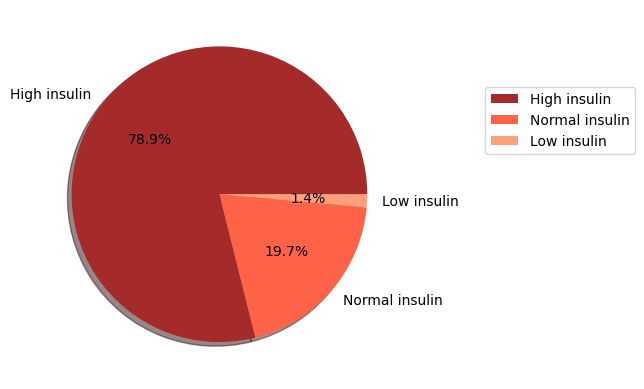

In [21]:
shades = ['brown','tomato','lightsalmon']
data={
    'High insulin' : high_insulin,
    'Normal insulin': normal_insulin,
    'Low insulin': low_insulin
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

In [22]:
dia_high_insulin=((df['Insulin'] >105) & (df['Outcome']==1)).sum()
not_dia_high_insulin=((df['Insulin'] >105) & (df['Outcome']==0)).sum()
print(dia_high_insulin, not_dia_high_insulin)

248 358


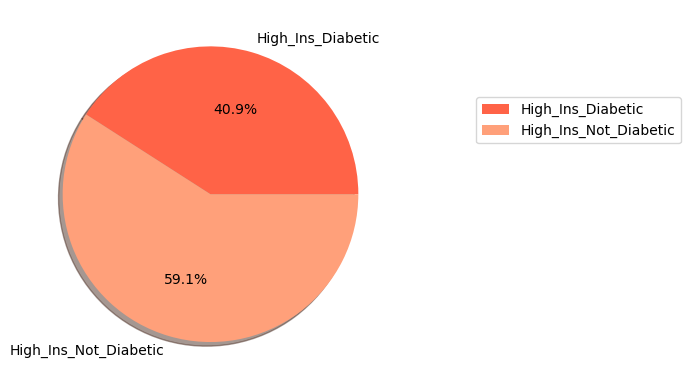

In [23]:
shades = ['tomato','lightsalmon']
data={
    'High_Ins_Diabetic' : dia_high_insulin,
    'High_Ins_Not_Diabetic': not_dia_high_insulin
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()